# Сессия №1

## Модуль №1 загрузка данных

Устанавливаем настройки для отображения датасета полностью при этом импортирую нужные для загрузки и обработки данных библиотеки

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 700)

### Загружаем нашу таблицу с данными для последующей обработки полученной информации

In [2]:
df = pd.read_csv(r'C:\Users\nicka\Downloads\Telegram Desktop\diabetes_prediction_dataset.csv',sep = ',') # выставляем параметр
df                                                                                                       # sep = ',' т.к. внутри
                                                                                                         # csv документа разделителями
                                                                                                         # являются запятые

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Т.к. колонки обозначены на английском языке и некоторыми аббревиатурами составляем словарь для лучшего понимания данных:

gender - пол человека \
age - возраст человека \
hypertension - есть ли гипертония \
heart_disease - есть ли болезнь сердца \
smoking_history - курил, не курил, сейчас курит \
bmi - индекс массы тела ИМТ \
HbA1c_level - уровень гликозилированного гемоглобина \
blood_glucose_level - уровень глюкозы в крови \
diabetes - есть ли диабет 

## Наша поставленная задача - прогнозирования диабета, следовательно колонка diabetes является целевой для исследований зависимостей и корреляций

Визуализируем пропущенные значения в данных для последующей обработки их

<Axes: >

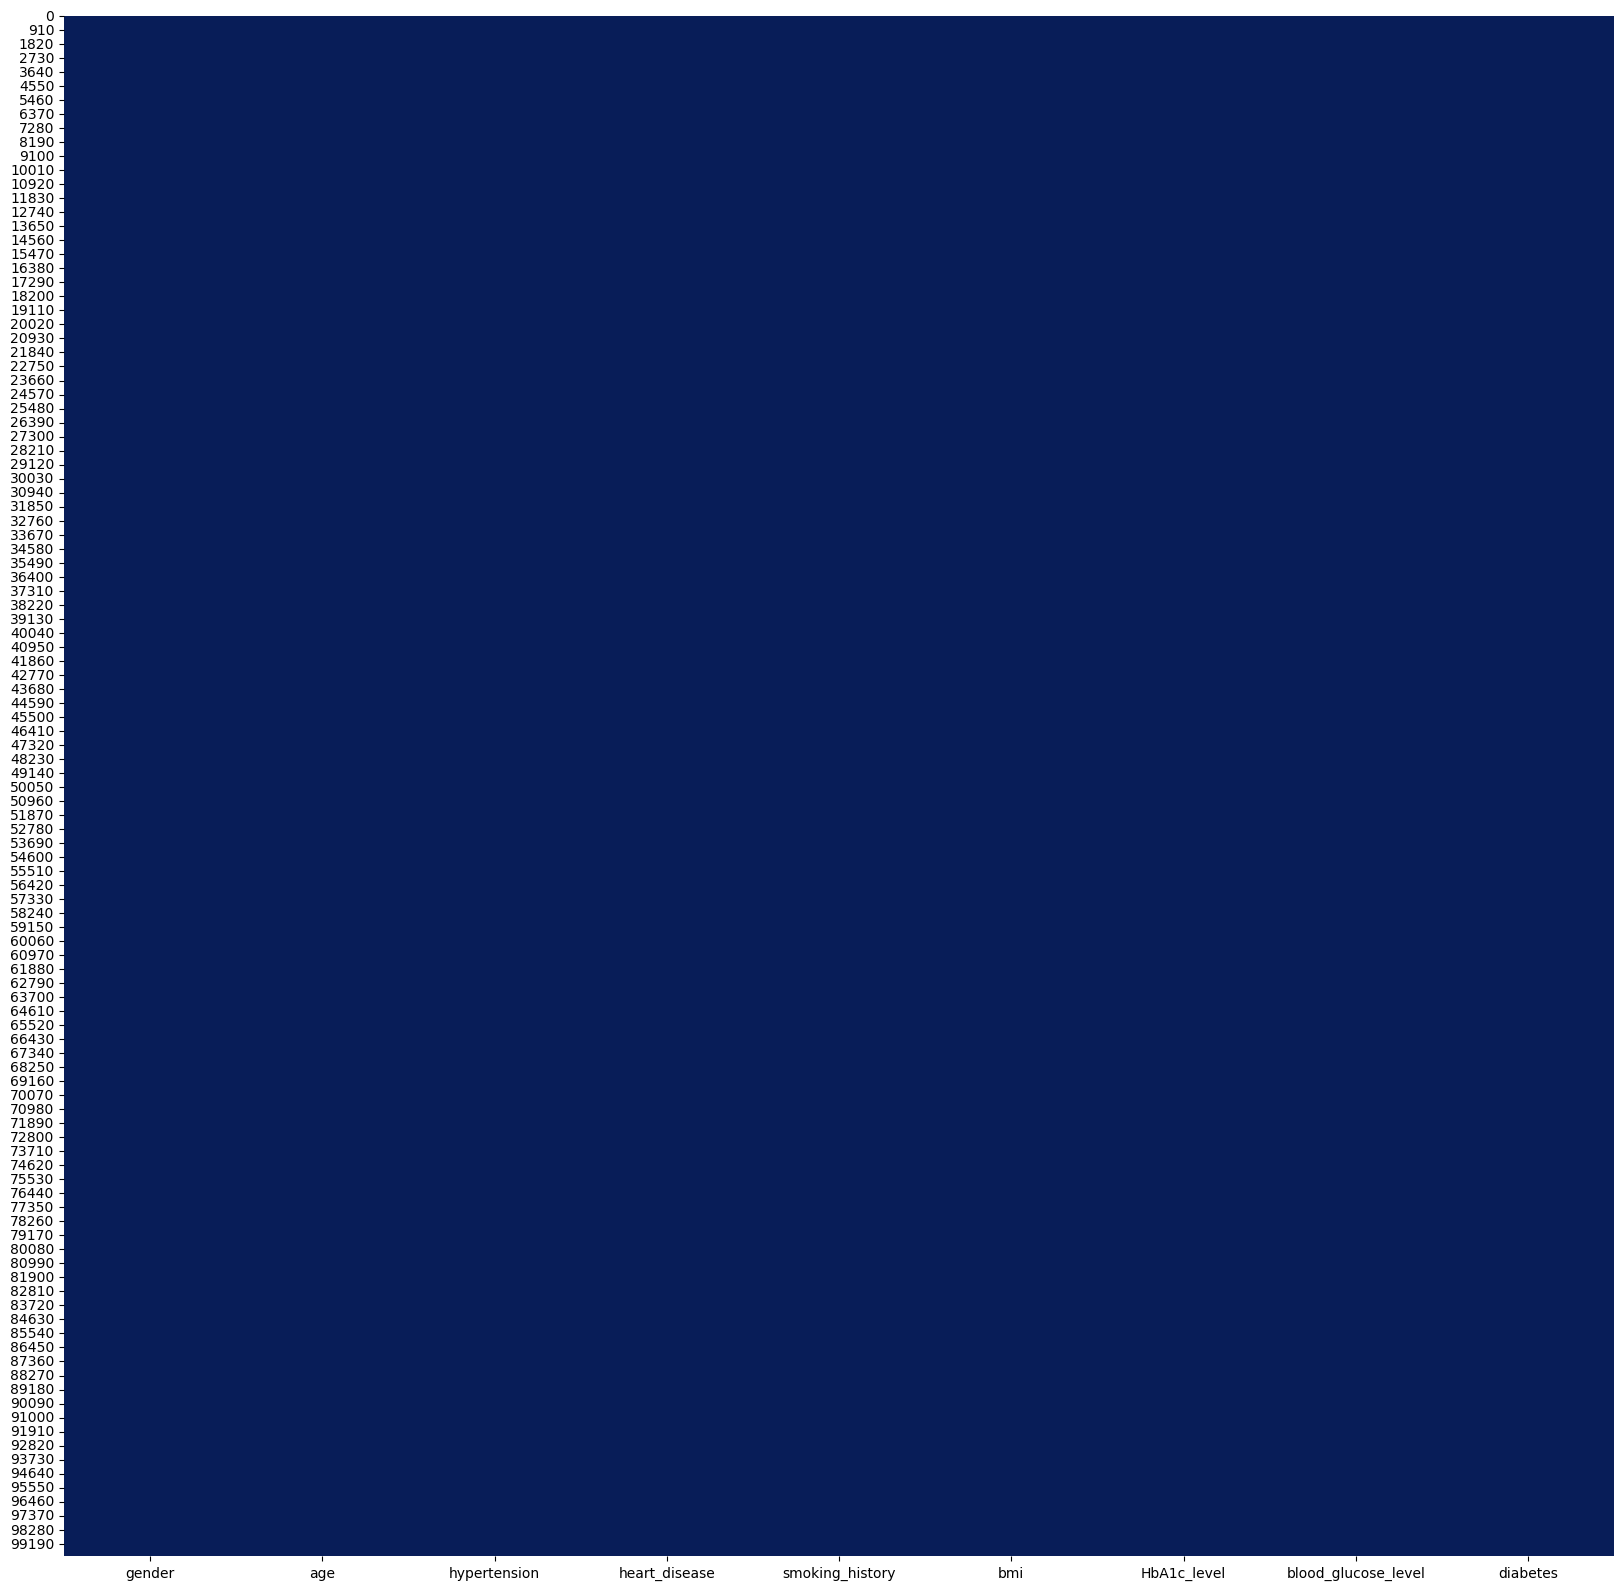

In [3]:
# Импортируем библиотеки визуализации
import seaborn as sns
import matplotlib.pyplot as plt
#------------------------------------
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Как видим пропущенных данных нет

### Избавляемся от дубликатов в строках нашего dataframe

In [5]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True,drop = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


### Выводим основную информацию о типе колонок датасета

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.6+ MB


и основываясь на заключении о целевой колонке выводим карту корреляций

<Axes: >

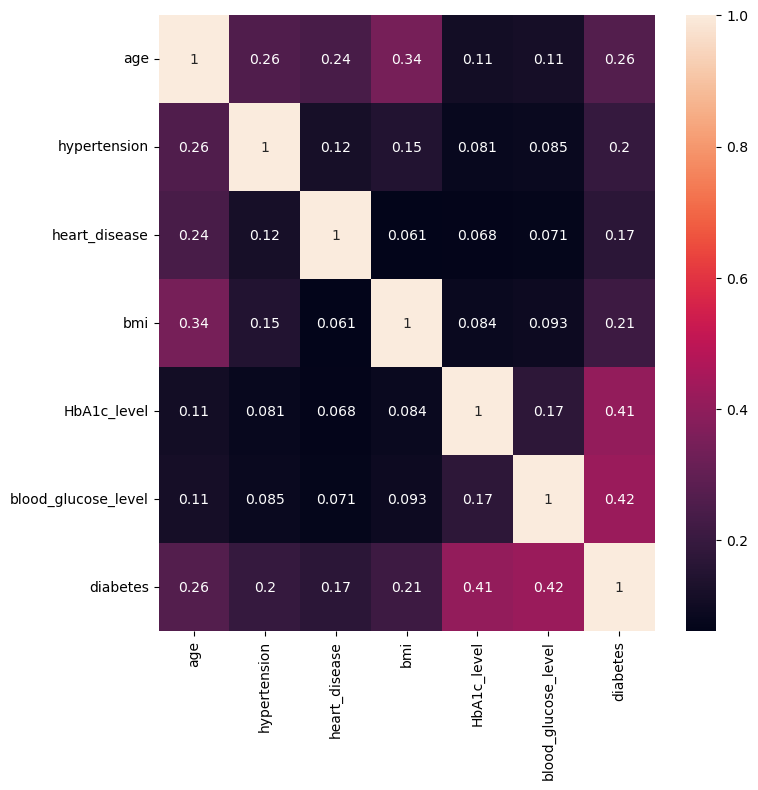

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(data = df.drop(columns = ['gender','smoking_history']).corr(),annot=True)

видим что каждая колонка в наших данных коррелирует с целевой 

разные методы .corr(method = '') kendall spearman

### Выводим данные о различных параметрах числовых данных

для изучения поведения в них и нахождения аномалий и выбросов

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


In [9]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


Проверяем уникальные данные по столбцам на не типичные значения

### Gender

In [10]:
print('gender:')
print(df['gender'].unique())

gender:
['Female' 'Male' 'Other']


Видим что в колонке существует значение Other, попытаемся вывести его и обозначить

In [11]:
df[df['gender'] == 'Other'] 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12589,Other,10.0,0,0,not current,14.09,5.0,140,0
14730,Other,19.0,0,0,No Info,27.32,5.7,158,0
16574,Other,39.0,0,0,not current,31.24,6.2,85,0
18540,Other,10.0,0,0,not current,16.59,6.1,160,0
23023,Other,23.0,0,0,No Info,24.23,6.1,140,0
31547,Other,53.0,0,0,No Info,27.32,6.6,160,0
33299,Other,45.0,0,0,never,27.32,4.0,159,0
34393,Other,47.0,0,0,never,36.76,6.6,90,0
34466,Other,47.0,0,0,never,36.76,3.5,200,0
39626,Other,18.0,0,0,not current,30.19,6.1,90,0


Видим что остальные значения колонки всеразличные, различное кол-во лет, история курения, но колонки hypertension heart_disease и целевая diabetes одинаковые и равны нулю 

Но ведь наша задача состоит в прогнозе диабета, а т.к. мы в строках со значениями other не можем обозначить случаи развития или уже поставленного диабета будем считать эти строки выбросами и очистим данные от них

In [12]:
df.drop(index = df[df['gender'] == 'Other'].index,inplace = True)

In [13]:
df.reset_index(inplace=True,drop=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96123,Female,36.0,0,0,No Info,24.60,4.8,145,0
96124,Female,2.0,0,0,No Info,17.37,6.5,100,0
96125,Male,66.0,0,0,former,27.83,5.7,155,0
96126,Female,24.0,0,0,never,35.42,4.0,100,0


### Smoking_history

In [14]:
print('smoking_history:')
print(df['smoking_history'].unique())

smoking_history:
['never' 'No Info' 'current' 'former' 'ever' 'not current']


видим значение no info(нет информации) в колонке smoking_history

Отобразим некоторые значения строчек с no info

In [15]:
df[df['smoking_history'] == 'No Info'].sample(200).sort_values('age')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2754,Female,0.40,0,0,No Info,13.16,6.0,200,0
47668,Female,0.48,0,0,No Info,16.58,4.0,90,0
35236,Male,0.48,0,0,No Info,13.23,6.6,140,0
79167,Male,0.56,0,0,No Info,18.18,4.0,100,0
23347,Female,0.64,0,0,No Info,13.92,4.8,160,0
90778,Female,0.64,0,0,No Info,15.26,4.0,130,0
21649,Male,0.64,0,0,No Info,14.86,6.2,145,0
89274,Male,0.80,0,0,No Info,27.32,4.5,126,0
53458,Male,1.00,0,0,No Info,12.90,6.6,158,0
68752,Female,1.08,0,0,No Info,15.28,5.0,140,0


Сгруппируем остальные параметры по smoking_history

In [16]:
df.groupby('smoking_history').mean()

C:\Users\nicka\AppData\Local\Temp\ipykernel_2300\3256710657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoking_history').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,
No Info,32.630484,0.036222,0.027584,25.168421,5.466972,135.382774,0.043946
current,44.102803,0.090464,0.044471,28.443738,5.551082,139.722844,0.103077
ever,49.152114,0.104829,0.078309,28.764286,5.577783,139.330748,0.118089
former,57.020432,0.143779,0.097430,29.633860,5.653769,143.264222,0.170986
never,43.877159,0.092862,0.031865,28.120704,5.545576,138.805524,0.097020
not current,47.718182,0.076742,0.045919,28.219651,5.569932,139.445353,0.108508


Видим что по значению no info значения всех остальных колонок визуально ниже по среднему значению на каждый столбец

Также сравним количество детей в строках с разными значениями smoking_history

In [17]:
df.groupby(['smoking_history','age'])['gender'].count()

smoking_history  age  
No Info          0.08       36
                 0.16       56
                 0.24       82
                 0.32       85
                 0.40       62
                 0.48       79
                 0.56       94
                 0.64       96
                 0.72       96
                 0.80       94
                 0.88       83
                 1.00       79
                 1.08       90
                 1.16       78
                 1.24       83
                 1.32       86
                 1.40       91
                 1.48       96
                 1.56      104
                 1.64      109
                 1.72       88
                 1.80       95
                 1.88       74
                 2.00     1009
                 3.00      833
                 4.00      775
                 5.00      814
                 6.00      757
                 7.00      715
                 8.00      696
                 9.00      606
                

как оказалось в строках значения No Info количество пациентов возрастом меньше 10 лет намного больше чем в остальных колонках, поэтому при группировке средние значения были ниже чем у остальных строк данных

Но строки No info нельзя выбрасывать как недостающие значения, ведь количество всего строк с этим значением занимает второе место с небольшим отрывом

Также нельзя интерпретировать no info(нет информации) как never(никогда не курящий), ведь по таблице видим что даже в колонке с детьми до 10 лет существуют значения former, current, not current и ever: 

In [18]:
df[(df['age']<=10) & ((df['smoking_history'] != 'never') & (df['smoking_history'] !='No Info'))].sort_values('age')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
91575,Female,0.16,0,0,not current,16.55,3.5,160,0
48762,Male,0.24,0,0,not current,15.02,6.6,80,0
64458,Female,0.24,0,0,not current,27.32,5.0,90,0
9578,Male,0.24,0,0,not current,15.62,6.6,100,0
53722,Male,0.32,0,0,current,15.17,4.0,100,0
9988,Female,0.48,0,0,not current,18.87,6.2,140,0
68394,Male,0.64,0,0,not current,18.74,6.6,160,0
37053,Male,0.72,0,0,not current,18.46,6.0,90,0
90588,Male,0.72,0,0,not current,17.66,4.5,159,0
55988,Female,0.80,0,0,not current,15.00,6.1,160,0


Единственный разумный вариант - оставить эти строки, ведь они - важная часть данных без которых мы можем потерять будущую точность модели, ведь они тоже отображают свою информацию и связывают остальные данные

In [19]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

### Также проверяем бинарные данные

на всеразличные выбросы и отклонения

In [20]:
print('hypertension:')
print(df['hypertension'].unique())

hypertension:
[0 1]


In [21]:
print('heart_disease:')
print(df['heart_disease'].unique())

heart_disease:
[1 0]


In [22]:
print('diabetes:')
print(df['diabetes'].unique())

diabetes:
[0 1]


После проверки остальных данных принимаемся за колонки с числовыми значениями и их выбросами

<Axes: >

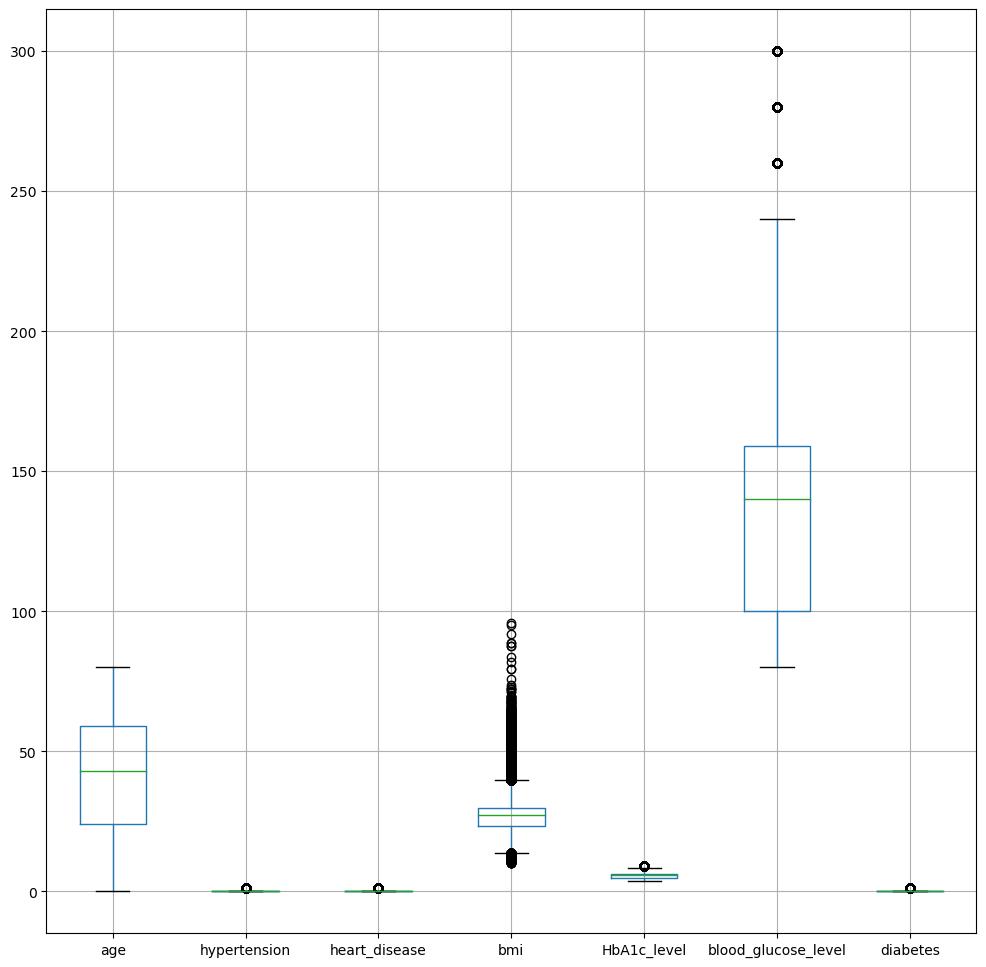

In [23]:
plt.figure(figsize = (12,12))
df.boxplot()

In [24]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = np.percentile(work_val, 25, method= 'midpoint')
    Q3 = np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:
            if len(df[col].unique()) != 2:
                up,low = quantiles(df[col])
                print(f'{col}: up = {up}, low = {low}')
                df[col] = df[col].drop(index = (df[col][(df[col] < low) | (df[col] > up)]).index) 

    return df.dropna().reset_index(drop=True)

In [25]:
df_copy = df.copy()

In [26]:
df_copy = anti_emmi(df_copy)
df_copy

age: up = 111.5, low = -28.5
bmi: up = 39.55, low = 13.709999999999997
HbA1c_level: up = 8.3, low = 2.6999999999999993
blood_glucose_level: up = 247.5, low = 11.5


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,Female,36.0,0,0,No Info,24.60,4.8,145.0,0
88173,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
88174,Male,66.0,0,0,former,27.83,5.7,155.0,0
88175,Female,24.0,0,0,never,35.42,4.0,100.0,0


Как видим выбросы были удалены

<Axes: >

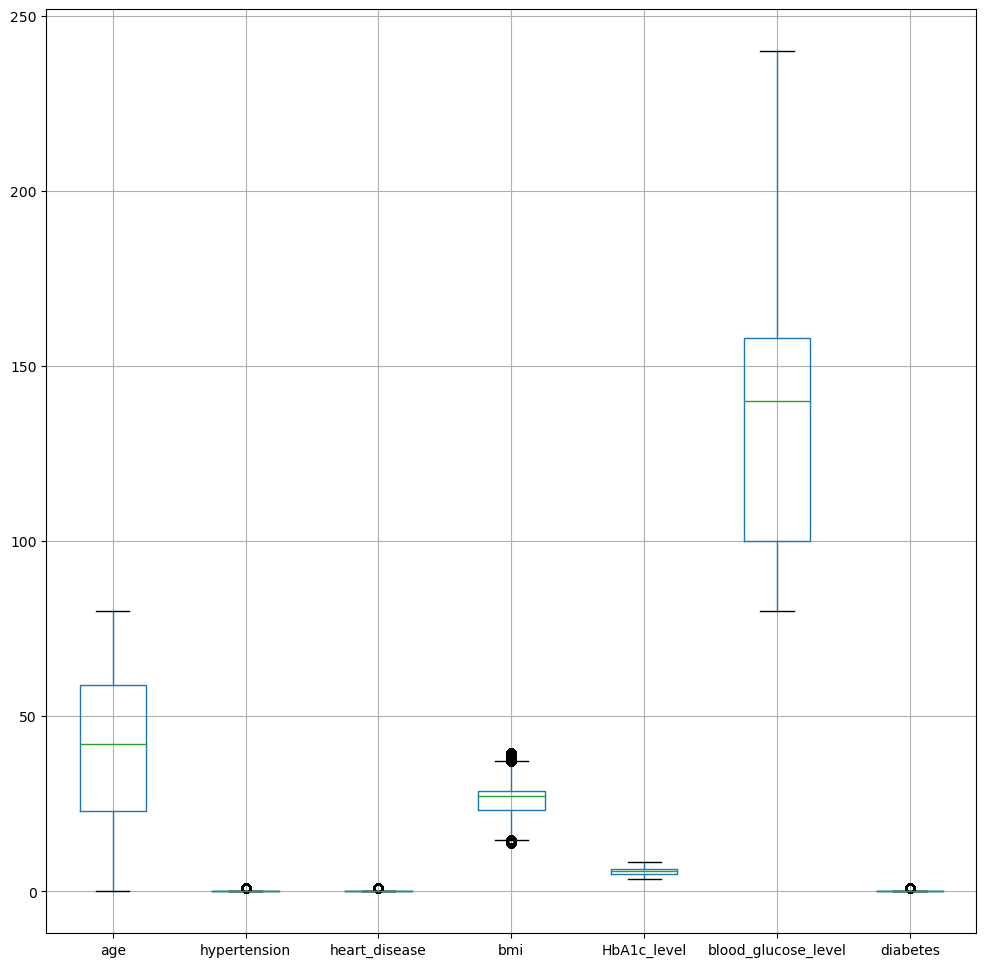

In [27]:
plt.figure(figsize = (12,12))
df_copy.boxplot()

Приводим строковые данные к единой форме

In [28]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = morph.normal_forms(doc)[0]
    return doc


df_copy['gender'] = df_copy['gender'].apply(lemmatize)
df_copy['smoking_history'] = df_copy['smoking_history'].apply(lemmatize)

In [29]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,female,80.0,0,1,never,25.19,6.6,140.0,0
1,female,54.0,0,0,no info,27.32,6.6,80.0,0
2,male,28.0,0,0,never,27.32,5.7,158.0,0
3,female,36.0,0,0,current,23.45,5.0,155.0,0
4,male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,female,36.0,0,0,no info,24.60,4.8,145.0,0
88173,female,2.0,0,0,no info,17.37,6.5,100.0,0
88174,male,66.0,0,0,former,27.83,5.7,155.0,0
88175,female,24.0,0,0,never,35.42,4.0,100.0,0


Кодируем данные для использования при обучении

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_gend = le.fit(df_copy.gender)
le_gend.classes_

array(['female', 'male'], dtype=object)

In [31]:
le = LabelEncoder()
le_smok = le.fit(df_copy.smoking_history)
le_smok.classes_

array(['current', 'ever', 'former', 'never', 'no info', 'not current'],
      dtype=object)

In [32]:
df_copy.gender = le_gend.transform(df_copy.gender)
df_copy.smoking_history = le_smok.transform(df_copy.smoking_history)

In [33]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140.0,0
1,0,54.0,0,0,4,27.32,6.6,80.0,0
2,1,28.0,0,0,3,27.32,5.7,158.0,0
3,0,36.0,0,0,0,23.45,5.0,155.0,0
4,1,76.0,1,1,0,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,0,36.0,0,0,4,24.60,4.8,145.0,0
88173,0,2.0,0,0,4,17.37,6.5,100.0,0
88174,1,66.0,0,0,2,27.83,5.7,155.0,0
88175,0,24.0,0,0,3,35.42,4.0,100.0,0


<Axes: >

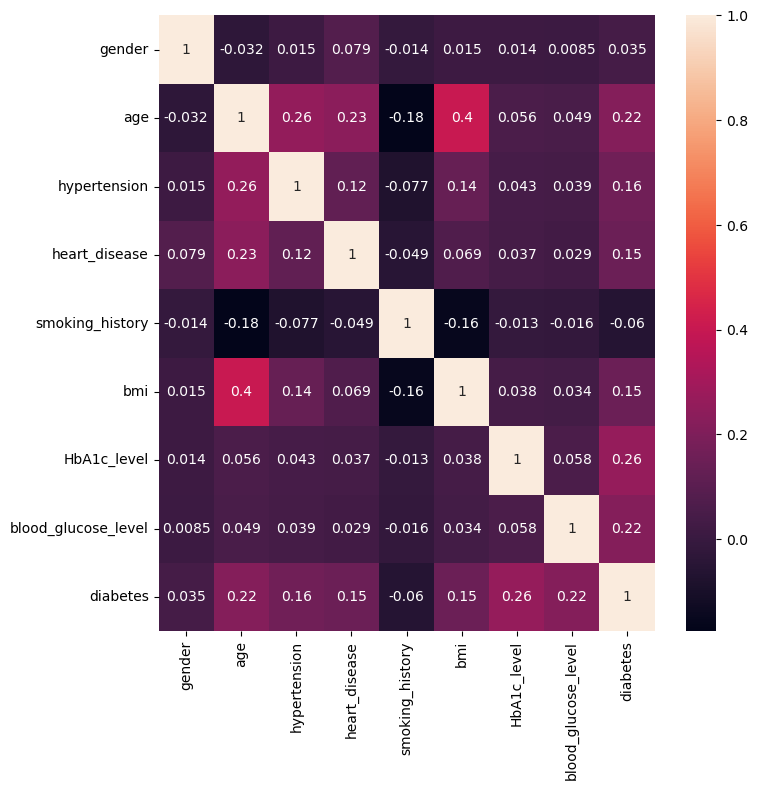

In [52]:
plt.figure(figsize= (8,8))
sns.heatmap(df_copy.corr(),annot=True)

Как видим по матрице корреляции единственная колонка которая плохо коррелирует со всеми остальными это gender попробуем исследовать её значения на зависимости

In [35]:
df_copy.groupby(['gender','age']).mean()

hypertension  heart_disease  smoking_history        bmi  \
gender age                                                              
0      0.08       0.000000       0.000000         4.000000  22.423750   
       0.16       0.000000       0.000000         4.000000  16.256923   
       0.24       0.000000       0.000000         4.030303  17.383030   
       0.32       0.000000       0.000000         3.968750  16.280000   
       0.40       0.000000       0.000000         3.928571  17.384286   
       0.48       0.000000       0.000000         3.976190  16.757143   
       0.56       0.000000       0.000000         3.969697  17.853333   
       0.64       0.000000       0.000000         3.980392  17.206863   
       0.72       0.000000       0.000000         3.955556  17.936889   
       0.80       0.000000       0.000000         3.950000  18.050250   
       0.88       0.000000       0.000000         3.916667  18.275417   
       1.00       0.000000       0.000000         3.913043  19.377609   
       1.08       0.000000       0.000000         3.931818  18.104318   
       1.16       0.000000       0.000000         4.000000  18.621429   
       1.24       0.000000       0.000000         3.928571  18.496667   
       1.32       0.000000       0.000000         3.840000  19.518200   
       1.40       0.000000       0.000000         3.872340  19.063404   
       1.48       0.000000       0.000000         3.877551  19.125306   
       1.56       0.000000       0.000000         3.906250  18.204687   
       1.64       0.000000       0.000000         3.931034  17.744138   
       1.72       0.000000       0.000000         3.868421  19.233421   
       1.80       0.000000       0.000000         3.854167  17.949792   
       1.88       0.000000       0.000000         3.857143  18.585714   
       2.00       0.000000       0.000000         3.892532  18.627887   
       3.00       0.000000       0.000000         3.887892  19.300336   
       4.00       0.002232       0.000000         3.883929  18.590290   
       5.00       0.000000       0.000000         3.890351  18.628706   
       6.00       0.000000       0.000000         3.873810  18.735333   
       7.00       0.000000       0.000000         3.863741  19.586721   
       8.00       0.000000       0.000000         3.905028  19.932011   
       9.00       0.000000       0.000000         3.838068  20.595511   
       10.00      0.000000       0.000000         3.835859  21.897727   
       11.00      0.002674       0.000000         3.791444  22.343556   
       12.00      0.000000       0.000000         3.766827  22.508365   
       13.00      0.000000       0.000000         3.748219  22.888314   
       14.00      0.000000       0.000000         3.668235  23.957129   
       15.00      0.002222       0.000000         3.535556  23.990667   
       16.00      0.000000       0.000000         3.518962  24.697824   
       17.00      0.000000       0.000000         3.378531  24.882411   
       18.00      0.000000       0.000000         3.296178  25.058997   
       19.00      0.000000       0.000000         3.077612  24.974567   
       20.00      0.000000       0.001342         2.951678  25.336013   
       21.00      0.005487       0.000000         2.965706  25.802236   
       22.00      0.001319       0.001319         2.914248  25.778575   
       23.00      0.002632       0.000000         2.752632  25.854513   
       24.00      0.003896       0.000000         2.828571  26.220260   
       25.00      0.009421       0.000000         2.823688  26.337470   
       26.00      0.001319       0.000000         2.812665  26.471689   
       27.00      0.005340       0.000000         2.774366  26.482417   
       28.00      0.003831       0.000000         2.856960  26.713295   
       29.00      0.012771       0.001277         2.822478  27.128480   
       30.00      0.013405       0.001340         2.873995  26.957225   
       31.00      0.012245       0.000000         2.851701  27.155020   

Как можно увидеть по нашей группировке значение пола мужчины больше подвержены заболеванию диабета к старости чем женщины, это также является зависимостью которая может помочь при прогнозах диабета

Вывод - оставляем колонку gender ведь она всё же содержит связь с остальными данными по неявной зависимости

In [36]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140.0,0
1,0,54.0,0,0,4,27.32,6.6,80.0,0
2,1,28.0,0,0,3,27.32,5.7,158.0,0
3,0,36.0,0,0,0,23.45,5.0,155.0,0
4,1,76.0,1,1,0,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,0,36.0,0,0,4,24.60,4.8,145.0,0
88173,0,2.0,0,0,4,17.37,6.5,100.0,0
88174,1,66.0,0,0,2,27.83,5.7,155.0,0
88175,0,24.0,0,0,3,35.42,4.0,100.0,0


In [37]:
df_copy.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,0.415479,39.925934,0.058857,0.030422,3.044005,26.134491,5.397368,132.815376
1,0.493937,61.817887,0.242313,0.153746,2.693374,29.569744,6.577977,167.447813


Также, предобрабатывая данные стоит нормализовать их для получения лучшего результата при последующем обучении модели

In [38]:
from sklearn.preprocessing import MinMaxScaler
data = df_copy[['age','bmi','HbA1c_level','blood_glucose_level']]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.transform(data))
data = scaler.transform(data)

MinMaxScaler()
[[1.         0.44427245 0.65957447 0.375     ]
 [0.67467467 0.52670279 0.65957447 0.        ]
 [0.34934935 0.52670279 0.46808511 0.4875    ]
 ...
 [0.82482482 0.54643963 0.46808511 0.46875   ]
 [0.2992993  0.84017028 0.10638298 0.125     ]
 [0.71221221 0.3374613  0.65957447 0.0625    ]]


In [39]:
df_copy[['age','bmi','HbA1c_level','blood_glucose_level']] = data
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,3,0.444272,0.659574,0.37500,0
1,0,0.674675,0,0,4,0.526703,0.659574,0.00000,0
2,1,0.349349,0,0,3,0.526703,0.468085,0.48750,0
3,0,0.449449,0,0,0,0.376935,0.319149,0.46875,0
4,1,0.949950,1,1,0,0.248839,0.276596,0.46875,0
...,...,...,...,...,...,...,...,...,...
88172,0,0.449449,0,0,4,0.421440,0.276596,0.40625,0
88173,0,0.024024,0,0,4,0.141641,0.638298,0.12500,0
88174,1,0.824825,0,0,2,0.546440,0.468085,0.46875,0
88175,0,0.299299,0,0,3,0.840170,0.106383,0.12500,0


Рассмотрим полученные данные маркируя их по y

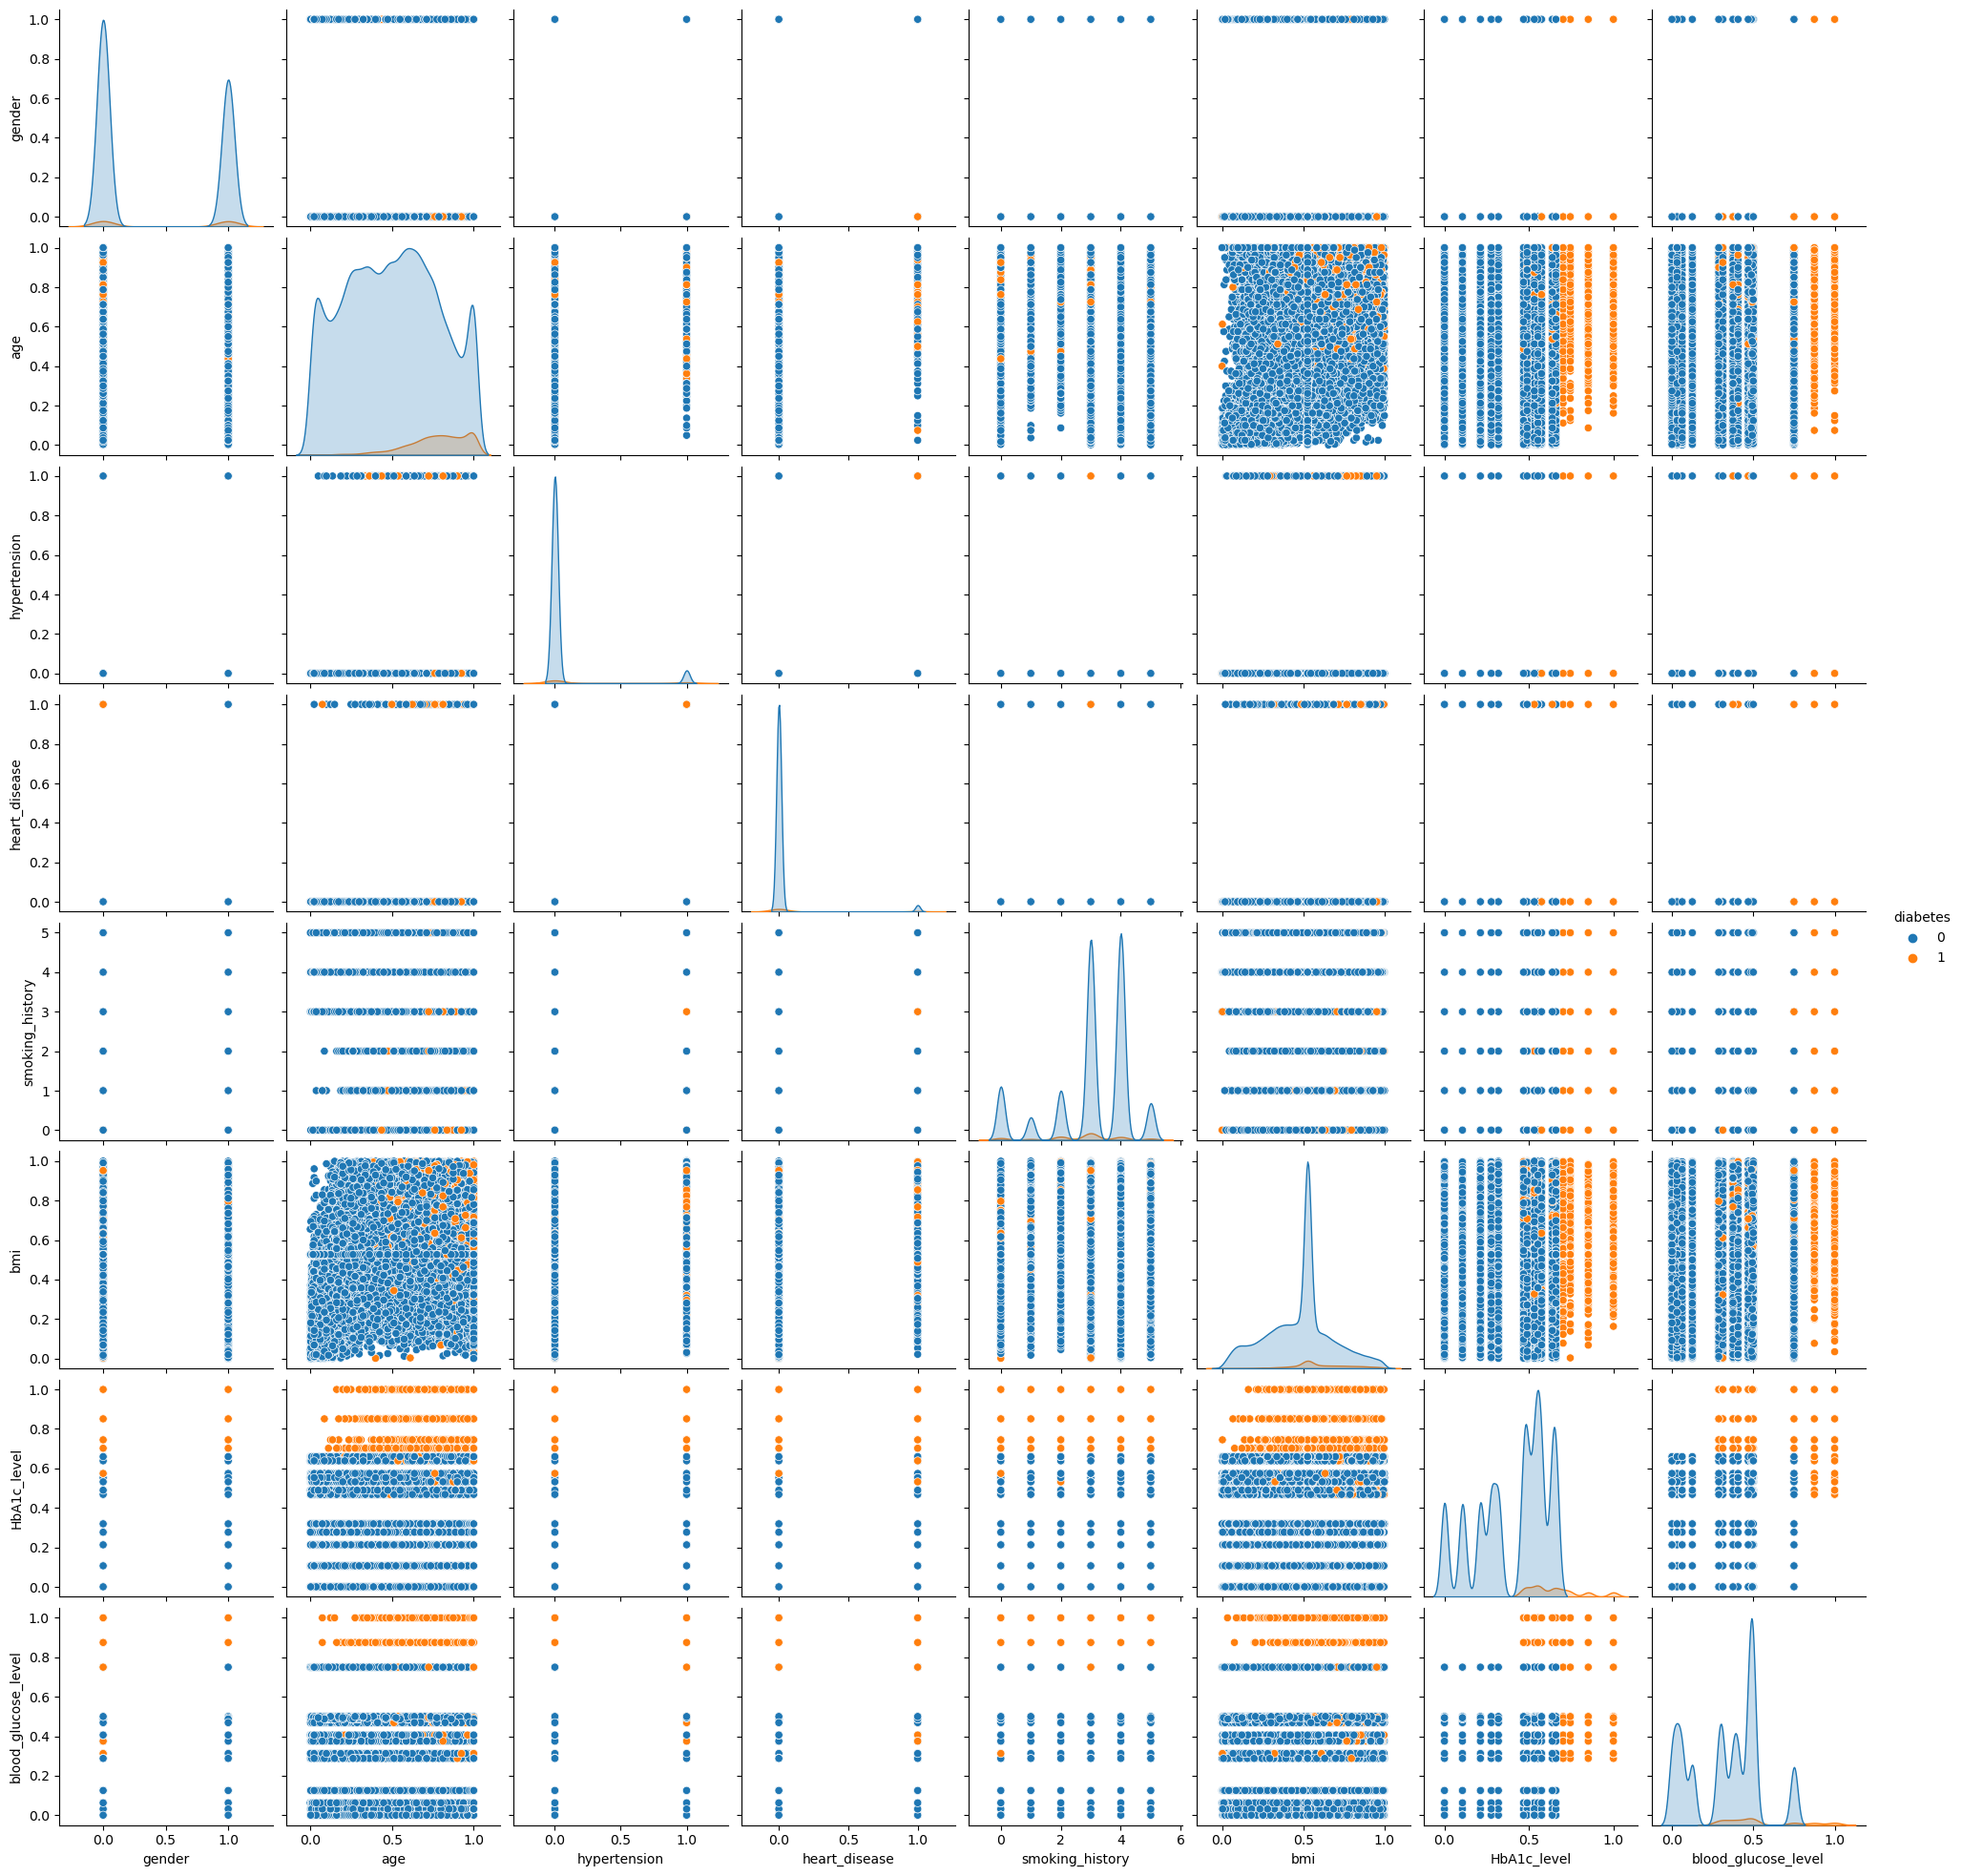

In [330]:
sns.pairplot(df_copy, hue='diabetes')

Text(0.5, 0, 'PC3')

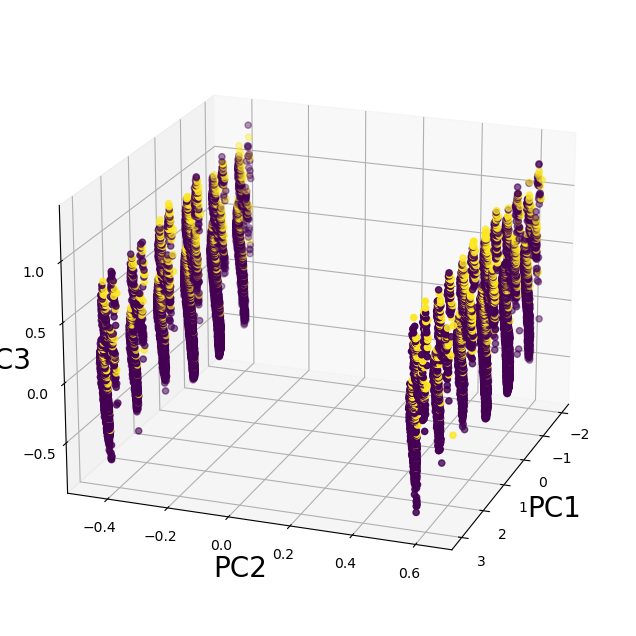

In [326]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
Z = pca.transform(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Text(0.5, 0, 'PC3')

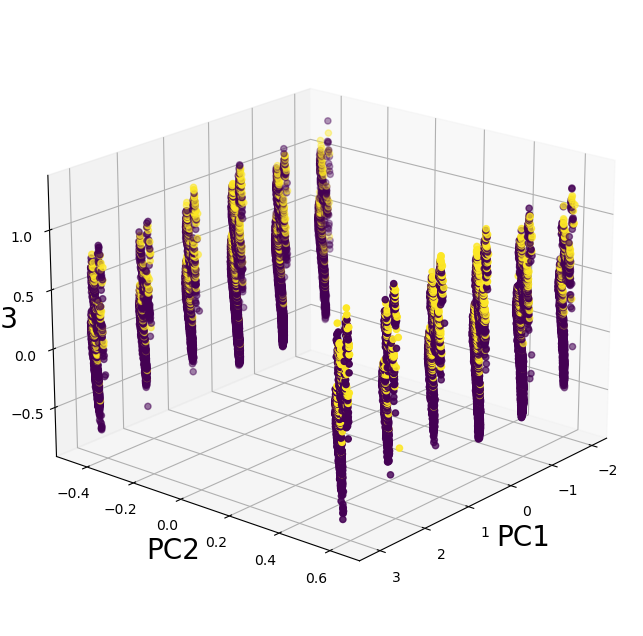

In [327]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 40)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Text(0.5, 0, 'PC3')

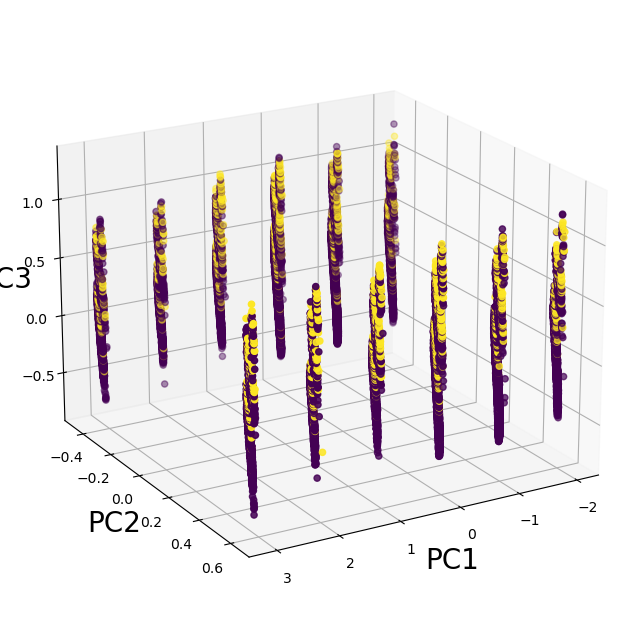

In [328]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 60)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Заметим, что в целевой переменной присутствует значительный дисбаланс классов

In [293]:
df_copy['diabetes'].value_counts()

0    83559
1     4618
Name: diabetes, dtype: int64

<Axes: >

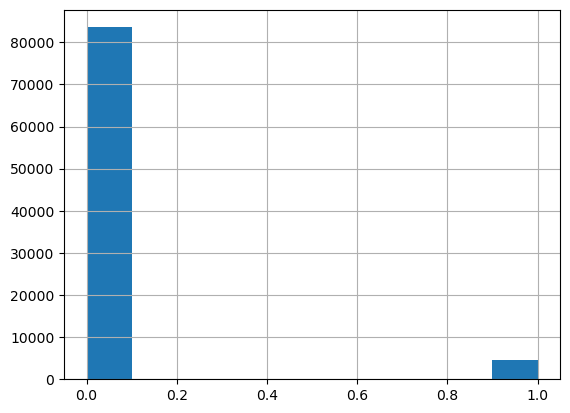

In [294]:
df_copy.diabetes.hist()

Но перед решением этой проблемы сначала разделим наши данные на обучающую и тестирующую выборки

In [40]:
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns = 'diabetes')
y = df_copy.diabetes

In [41]:
print(X)
print(list(y))

       gender       age  hypertension  heart_disease  smoking_history  \
0           0  1.000000             0              1                3   
1           0  0.674675             0              0                4   
2           1  0.349349             0              0                3   
3           0  0.449449             0              0                0   
4           1  0.949950             1              1                0   
...       ...       ...           ...            ...              ...   
88172       0  0.449449             0              0                4   
88173       0  0.024024             0              0                4   
88174       1  0.824825             0              0                2   
88175       0  0.299299             0              0                3   
88176       0  0.712212             0              0                0   

            bmi  HbA1c_level  blood_glucose_level  
0      0.444272     0.659574              0.37500  
1      0.526703    

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

А теперь избавляемся от дисбаланса классов заполняя обучающую выборку

In [43]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

Теперь видим что дисбаланс по классам пропал

<Axes: >

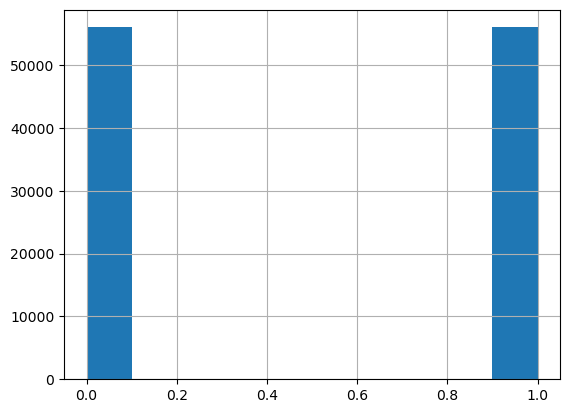

In [44]:
y_train.hist()

# Gender оставление VS Gender убивение

In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
    loss_function='CrossEntropy'
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)

0:	learn: 0.4894940	test: 0.4828165	best: 0.4828165 (0)	total: 174ms	remaining: 1m 9s
1:	learn: 0.4098890	test: 0.4127331	best: 0.4127331 (1)	total: 189ms	remaining: 37.5s
2:	learn: 0.3447459	test: 0.3371538	best: 0.3371538 (2)	total: 202ms	remaining: 26.8s
3:	learn: 0.3113115	test: 0.3029501	best: 0.3029501 (3)	total: 216ms	remaining: 21.4s
4:	learn: 0.2848581	test: 0.2882221	best: 0.2882221 (4)	total: 229ms	remaining: 18.1s
5:	learn: 0.2586160	test: 0.2746432	best: 0.2746432 (5)	total: 242ms	remaining: 15.9s
6:	learn: 0.2407648	test: 0.2542096	best: 0.2542096 (6)	total: 255ms	remaining: 14.3s
7:	learn: 0.2191229	test: 0.2417315	best: 0.2417315 (7)	total: 268ms	remaining: 13.1s
8:	learn: 0.2055970	test: 0.2319456	best: 0.2319456 (8)	total: 282ms	remaining: 12.3s
9:	learn: 0.1937909	test: 0.2171997	best: 0.2171997 (9)	total: 296ms	remaining: 11.5s
10:	learn: 0.1897131	test: 0.2127389	best: 0.2127389 (10)	total: 309ms	remaining: 10.9s
11:	learn: 0.1866061	test: 0.2088736	best: 0.2088736

94:	learn: 0.0660839	test: 0.0929302	best: 0.0929302 (94)	total: 1.68s	remaining: 5.4s
95:	learn: 0.0657834	test: 0.0927791	best: 0.0927791 (95)	total: 1.71s	remaining: 5.41s
96:	learn: 0.0655793	test: 0.0926335	best: 0.0926335 (96)	total: 1.73s	remaining: 5.42s
97:	learn: 0.0654263	test: 0.0924658	best: 0.0924658 (97)	total: 1.75s	remaining: 5.4s
98:	learn: 0.0653483	test: 0.0923928	best: 0.0923928 (98)	total: 1.78s	remaining: 5.41s
99:	learn: 0.0652424	test: 0.0923183	best: 0.0923183 (99)	total: 1.8s	remaining: 5.41s
100:	learn: 0.0651320	test: 0.0922591	best: 0.0922591 (100)	total: 1.83s	remaining: 5.42s
101:	learn: 0.0646852	test: 0.0920930	best: 0.0920930 (101)	total: 1.85s	remaining: 5.41s
102:	learn: 0.0644832	test: 0.0919907	best: 0.0919907 (102)	total: 1.88s	remaining: 5.41s
103:	learn: 0.0643885	test: 0.0918915	best: 0.0918915 (103)	total: 1.9s	remaining: 5.41s
104:	learn: 0.0641859	test: 0.0917585	best: 0.0917585 (104)	total: 1.93s	remaining: 5.41s
105:	learn: 0.0640875	test

191:	learn: 0.0534663	test: 0.0868903	best: 0.0868903 (191)	total: 3.37s	remaining: 3.65s
192:	learn: 0.0534419	test: 0.0868723	best: 0.0868723 (192)	total: 3.4s	remaining: 3.64s
193:	learn: 0.0533915	test: 0.0868311	best: 0.0868311 (193)	total: 3.42s	remaining: 3.63s
194:	learn: 0.0533588	test: 0.0868334	best: 0.0868311 (193)	total: 3.43s	remaining: 3.61s
195:	learn: 0.0533033	test: 0.0868486	best: 0.0868311 (193)	total: 3.45s	remaining: 3.59s
196:	learn: 0.0532785	test: 0.0868495	best: 0.0868311 (193)	total: 3.46s	remaining: 3.56s
197:	learn: 0.0532361	test: 0.0868554	best: 0.0868311 (193)	total: 3.48s	remaining: 3.54s
198:	learn: 0.0531126	test: 0.0868231	best: 0.0868231 (198)	total: 3.49s	remaining: 3.52s
199:	learn: 0.0530682	test: 0.0868102	best: 0.0868102 (199)	total: 3.5s	remaining: 3.5s
200:	learn: 0.0529503	test: 0.0867788	best: 0.0867788 (200)	total: 3.52s	remaining: 3.48s
201:	learn: 0.0528877	test: 0.0867745	best: 0.0867745 (201)	total: 3.53s	remaining: 3.46s
202:	learn: 0

291:	learn: 0.0475119	test: 0.0860732	best: 0.0860389 (285)	total: 5.11s	remaining: 1.89s
292:	learn: 0.0474766	test: 0.0860632	best: 0.0860389 (285)	total: 5.14s	remaining: 1.88s
293:	learn: 0.0474451	test: 0.0860702	best: 0.0860389 (285)	total: 5.18s	remaining: 1.87s
294:	learn: 0.0474256	test: 0.0860636	best: 0.0860389 (285)	total: 5.21s	remaining: 1.85s
295:	learn: 0.0473834	test: 0.0860650	best: 0.0860389 (285)	total: 5.24s	remaining: 1.84s
296:	learn: 0.0473391	test: 0.0860481	best: 0.0860389 (285)	total: 5.26s	remaining: 1.82s
297:	learn: 0.0472353	test: 0.0860173	best: 0.0860173 (297)	total: 5.29s	remaining: 1.81s
298:	learn: 0.0472154	test: 0.0860191	best: 0.0860173 (297)	total: 5.31s	remaining: 1.79s
299:	learn: 0.0471705	test: 0.0859972	best: 0.0859972 (299)	total: 5.34s	remaining: 1.78s
300:	learn: 0.0471386	test: 0.0859910	best: 0.0859910 (300)	total: 5.38s	remaining: 1.77s
301:	learn: 0.0470705	test: 0.0859903	best: 0.0859903 (301)	total: 5.4s	remaining: 1.75s
302:	learn:

387:	learn: 0.0440371	test: 0.0858407	best: 0.0857879 (329)	total: 6.84s	remaining: 212ms
388:	learn: 0.0440037	test: 0.0858330	best: 0.0857879 (329)	total: 6.86s	remaining: 194ms
389:	learn: 0.0439827	test: 0.0858356	best: 0.0857879 (329)	total: 6.88s	remaining: 177ms
390:	learn: 0.0439628	test: 0.0858308	best: 0.0857879 (329)	total: 6.9s	remaining: 159ms
391:	learn: 0.0439216	test: 0.0858374	best: 0.0857879 (329)	total: 6.92s	remaining: 141ms
392:	learn: 0.0439003	test: 0.0858562	best: 0.0857879 (329)	total: 6.94s	remaining: 124ms
393:	learn: 0.0438771	test: 0.0858594	best: 0.0857879 (329)	total: 6.96s	remaining: 106ms
394:	learn: 0.0438418	test: 0.0858644	best: 0.0857879 (329)	total: 6.97s	remaining: 88.2ms
395:	learn: 0.0438062	test: 0.0858791	best: 0.0857879 (329)	total: 6.99s	remaining: 70.6ms
396:	learn: 0.0437832	test: 0.0858805	best: 0.0857879 (329)	total: 7s	remaining: 52.9ms
397:	learn: 0.0437338	test: 0.0858862	best: 0.0857879 (329)	total: 7.02s	remaining: 35.3ms
398:	learn

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27529
           1       0.88      0.51      0.65      1570

    accuracy                           0.97     29099
   macro avg       0.92      0.75      0.82     29099
weighted avg       0.97      0.97      0.97     29099



In [49]:
X_train, X_test, y_train, y_test = train_test_split(
        X.drop(columns='gender'), y, test_size=0.33, random_state=42)
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
    loss_function='CrossEntropy'
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)

0:	learn: 0.5202894	test: 0.5304140	best: 0.5304140 (0)	total: 32.2ms	remaining: 12.9s
1:	learn: 0.4175626	test: 0.4170928	best: 0.4170928 (1)	total: 47.4ms	remaining: 9.44s
2:	learn: 0.3413473	test: 0.3358895	best: 0.3358895 (2)	total: 62.9ms	remaining: 8.32s
3:	learn: 0.3053377	test: 0.2950350	best: 0.2950350 (3)	total: 80ms	remaining: 7.92s
4:	learn: 0.2821117	test: 0.2763741	best: 0.2763741 (4)	total: 96.3ms	remaining: 7.61s
5:	learn: 0.2695531	test: 0.2693405	best: 0.2693405 (5)	total: 113ms	remaining: 7.39s
6:	learn: 0.2521942	test: 0.2607488	best: 0.2607488 (6)	total: 129ms	remaining: 7.21s
7:	learn: 0.2324556	test: 0.2484403	best: 0.2484403 (7)	total: 149ms	remaining: 7.28s
8:	learn: 0.2212329	test: 0.2403822	best: 0.2403822 (8)	total: 165ms	remaining: 7.17s
9:	learn: 0.2067702	test: 0.2326739	best: 0.2326739 (9)	total: 181ms	remaining: 7.07s
10:	learn: 0.1997977	test: 0.2272396	best: 0.2272396 (10)	total: 197ms	remaining: 6.98s
11:	learn: 0.1927602	test: 0.2213263	best: 0.2213

106:	learn: 0.0719471	test: 0.0967970	best: 0.0967970 (106)	total: 1.96s	remaining: 5.37s
107:	learn: 0.0718540	test: 0.0967214	best: 0.0967214 (107)	total: 1.98s	remaining: 5.35s
108:	learn: 0.0717741	test: 0.0966805	best: 0.0966805 (108)	total: 2s	remaining: 5.34s
109:	learn: 0.0714610	test: 0.0964926	best: 0.0964926 (109)	total: 2.02s	remaining: 5.32s
110:	learn: 0.0712257	test: 0.0964143	best: 0.0964143 (110)	total: 2.03s	remaining: 5.29s
111:	learn: 0.0710382	test: 0.0963292	best: 0.0963292 (111)	total: 2.04s	remaining: 5.25s
112:	learn: 0.0707211	test: 0.0962055	best: 0.0962055 (112)	total: 2.06s	remaining: 5.22s
113:	learn: 0.0700624	test: 0.0960044	best: 0.0960044 (113)	total: 2.07s	remaining: 5.2s
114:	learn: 0.0699607	test: 0.0958789	best: 0.0958789 (114)	total: 2.08s	remaining: 5.17s
115:	learn: 0.0692442	test: 0.0951111	best: 0.0951111 (115)	total: 2.1s	remaining: 5.14s
116:	learn: 0.0690057	test: 0.0949805	best: 0.0949805 (116)	total: 2.11s	remaining: 5.11s
117:	learn: 0.0

206:	learn: 0.0561212	test: 0.0888675	best: 0.0888675 (206)	total: 3.47s	remaining: 3.24s
207:	learn: 0.0560690	test: 0.0888435	best: 0.0888435 (207)	total: 3.49s	remaining: 3.22s
208:	learn: 0.0560005	test: 0.0888682	best: 0.0888435 (207)	total: 3.5s	remaining: 3.2s
209:	learn: 0.0559611	test: 0.0888458	best: 0.0888435 (207)	total: 3.52s	remaining: 3.18s
210:	learn: 0.0558976	test: 0.0888441	best: 0.0888435 (207)	total: 3.53s	remaining: 3.16s
211:	learn: 0.0558381	test: 0.0888226	best: 0.0888226 (211)	total: 3.55s	remaining: 3.14s
212:	learn: 0.0557811	test: 0.0888547	best: 0.0888226 (211)	total: 3.56s	remaining: 3.13s
213:	learn: 0.0557130	test: 0.0888336	best: 0.0888226 (211)	total: 3.58s	remaining: 3.11s
214:	learn: 0.0556668	test: 0.0888422	best: 0.0888226 (211)	total: 3.59s	remaining: 3.09s
215:	learn: 0.0555369	test: 0.0888189	best: 0.0888189 (215)	total: 3.6s	remaining: 3.07s
216:	learn: 0.0554955	test: 0.0887674	best: 0.0887674 (216)	total: 3.62s	remaining: 3.05s
217:	learn: 0

311:	learn: 0.0497948	test: 0.0874737	best: 0.0874737 (311)	total: 4.99s	remaining: 1.41s
312:	learn: 0.0497605	test: 0.0874525	best: 0.0874525 (312)	total: 5.01s	remaining: 1.39s
313:	learn: 0.0497214	test: 0.0874324	best: 0.0874324 (313)	total: 5.03s	remaining: 1.38s
314:	learn: 0.0497201	test: 0.0874328	best: 0.0874324 (313)	total: 5.04s	remaining: 1.36s
315:	learn: 0.0496615	test: 0.0874108	best: 0.0874108 (315)	total: 5.05s	remaining: 1.34s
316:	learn: 0.0495968	test: 0.0873954	best: 0.0873954 (316)	total: 5.07s	remaining: 1.33s
317:	learn: 0.0494842	test: 0.0873735	best: 0.0873735 (317)	total: 5.08s	remaining: 1.31s
318:	learn: 0.0493824	test: 0.0873551	best: 0.0873551 (318)	total: 5.09s	remaining: 1.29s
319:	learn: 0.0493377	test: 0.0873341	best: 0.0873341 (319)	total: 5.11s	remaining: 1.28s
320:	learn: 0.0492970	test: 0.0873195	best: 0.0873195 (320)	total: 5.12s	remaining: 1.26s
321:	learn: 0.0491889	test: 0.0872828	best: 0.0872828 (321)	total: 5.14s	remaining: 1.25s
322:	learn

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27529
           1       0.89      0.51      0.65      1570

    accuracy                           0.97     29099
   macro avg       0.93      0.76      0.82     29099
weighted avg       0.97      0.97      0.97     29099

